<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


*   Visualize the distribution of data.

*   Visualize the relationship between two features.

*   Visualize composition of data.

*   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
#!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

Connect to the database.


In [2]:
import pandas as pd

In [3]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


## Demo: How to run an sql query


In [4]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [5]:
import pandas as pd

In [6]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [7]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
df = pd.read_sql_query(QUERY,conn)
df.head()

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78


## Demo: How to describe a table


In [8]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


In [9]:
QUERY = """
SELECT ConvertedComp FROM master
"""

df = pd.read_sql_query(QUERY,conn)

<Axes: ylabel='Frequency'>

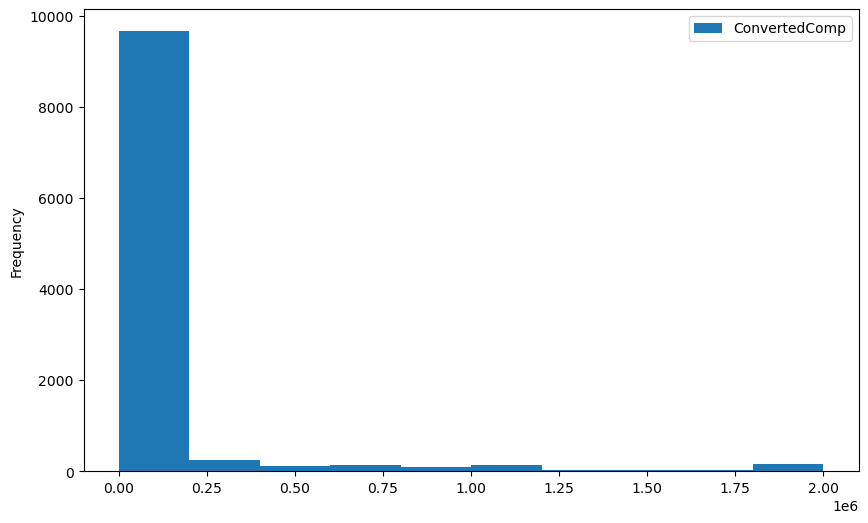

In [10]:
# your code goes here
df.plot(kind='hist', figsize=(10,6))

### Box Plots


Plot a box plot of `Age.`


<Axes: >

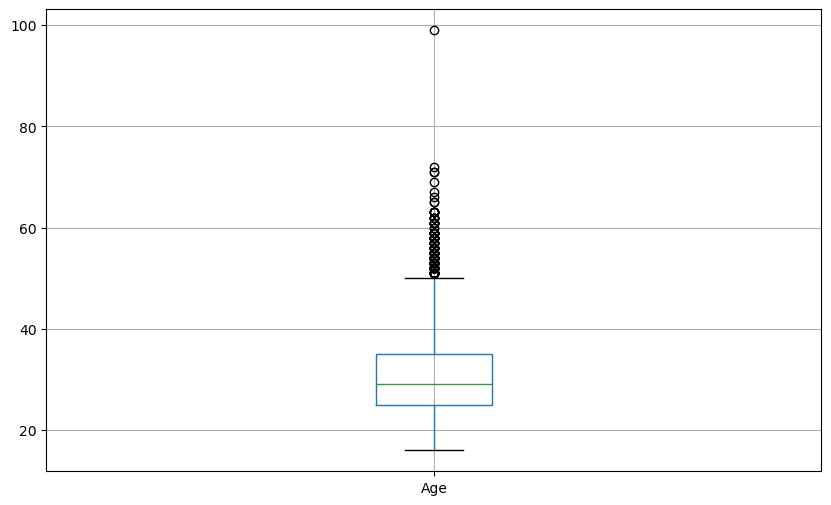

In [11]:
# your code goes here
QUERY = """
SELECT Age FROM master
"""

df = pd.read_sql_query(QUERY,conn)
df.boxplot(figsize=(10,6))

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


In [12]:
# your code goes here
QUERY = """
SELECT Age, WorkWeekHrs FROM master
"""
df_wk = pd.read_sql_query(QUERY,conn)
df_wk.head()

,Age,WorkWeekHrs
0,22.0,80.0
1,23.0,32.0
2,28.0,40.0
3,26.0,40.0
4,29.0,45.0


/Users/LCY/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1070: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='Age', ylabel='WorkWeekHrs'>

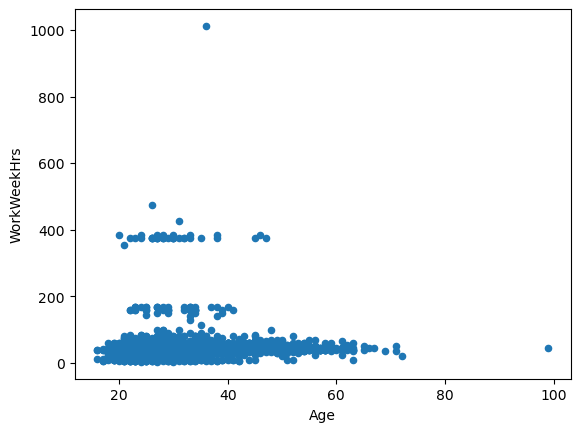

In [13]:
df_wk.plot.scatter(x='Age', y='WorkWeekHrs')

In [14]:
df_wk.corr(method='pearson')

,Age,WorkWeekHrs
Age,1.000000,0.036517
WorkWeekHrs,0.036517,1.000000


### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


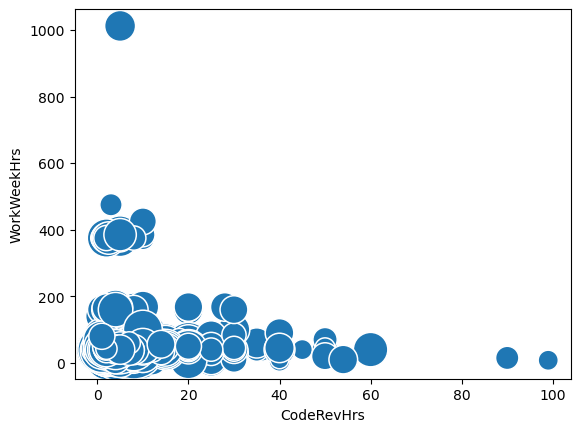

In [15]:
# your code goes here
import matplotlib.pyplot as plt
import seaborn as sns
QUERY = """
SELECT Age, WorkWeekHrs, CodeRevHrs FROM master
"""

df = pd.read_sql_query(QUERY,conn)
sns.scatterplot(data=df, x='CodeRevHrs', y='WorkWeekHrs', size='Age', legend=False, sizes=(20, 2000))
plt.show()

# Testing with table


## LanguageWorkedWith

In [16]:
QUERY = """
SELECT * FROM LanguageWorkedWith
"""
dl = pd.read_sql_query(QUERY,conn)
dl.head()

,Respondent,LanguageWorkedWith
0,4,C
1,4,C++
2,4,C#
3,4,Python
4,4,SQL


In [17]:
dl[dl['LanguageWorkedWith']=='SQL']['Respondent'].count()


7106

## LanguageDesireNextYear

In [18]:
QUERY = """
SELECT * FROM LanguageDesireNextYear
"""
dt = pd.read_sql_query(QUERY,conn)
dt.head()

,Respondent,LanguageDesireNextYear
0,4,C
1,4,C#
2,4,JavaScript
3,4,SQL
4,9,Bash/Shell/PowerShell


In [19]:
dt_p = dt.groupby(['LanguageDesireNextYear'])['Respondent'].count().sort_values(ascending=False)
dt_p.head()


LanguageDesireNextYear
JavaScript    6630
HTML/CSS      5328
Python        5239
SQL           5012
TypeScript    4088
Name: Respondent, dtype: int64

## DatabaseWorkedWith

In [20]:
QUERY = """
SELECT D.Respondent R, D.DatabaseWorkedWith as DB, M.MainBranch MB FROM DatabaseWorkedWith D, DevType T, master M  where D.Respondent = T.Respondent and M.Respondent = D.Respondent and (T.DevType like '%database%')
"""
db = pd.read_sql_query(QUERY,conn)
db


,R,DB,MB
0,9,DynamoDB,I am a developer by profession
1,9,PostgreSQL,I am a developer by profession
2,9,SQLite,I am a developer by profession
3,13,Couchbase,I am a developer by profession
4,13,DynamoDB,I am a developer by profession
...,...,...,...
4603,25118,MongoDB,I am a developer by profession
4604,25118,SQLite,I am a developer by profession
4605,25136,Microsoft SQL Server,I am a developer by profession
4606,25141,Microsoft SQL Server,I am a developer by profession


In [39]:
db.isnull().value_counts()

R      DB     MB   
False  False  False    4608
dtype: int64

In [41]:
db_t = db[(db['DB']=='MySQL')& (db['MB']=='I am a developer by profession')]['R'].count()
db_t

770

## Visualizing composition of data

## DatabaseDesireNextYear

### Pie Charts

Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.

In [23]:
# your code goes here
QUERY = """
SELECT * FROM DatabaseDesireNextYear
"""
df = pd.read_sql_query(QUERY,conn)
df.head()

,Respondent,DatabaseDesireNextYear
0,4,MySQL
1,4,SQLite
2,9,PostgreSQL
3,9,Redis
4,9,SQLite


In [24]:
df[df['DatabaseDesireNextYear']=='MySQL']['Respondent'].count()

3281

In [25]:
df_pie = df.groupby(['DatabaseDesireNextYear'])['Respondent'].count().sort_values(ascending=False).head()
df_pie


DatabaseDesireNextYear
PostgreSQL       4328
MongoDB          3649
Redis            3331
MySQL            3281
Elasticsearch    2856
Name: Respondent, dtype: int64

<Axes: ylabel='Respondent'>

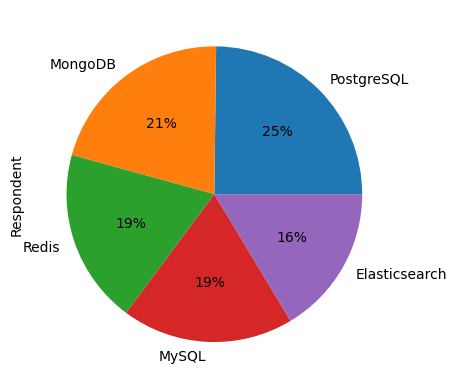

In [26]:
df_pie.plot(kind='pie', y='Respondent', autopct='%1.0f%%')


### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


## Visualizing comparison of data


In [27]:
# your code goes here
QUERY = """
SELECT * FROM DevType
"""
df_dev = pd.read_sql_query(QUERY,conn)
df_dev.head()

,Respondent,DevType
0,4,"Developer, full-stack"
1,9,Database administrator
2,9,"Developer, back-end"
3,9,"Developer, front-end"
4,9,"Developer, full-stack"


In [28]:
df_t = df_dev.groupby('DevType')['Respondent'].count()
df_t.sort_values(ascending=False)
                 

DevType
Developer, full-stack                            6928
Developer, back-end                              6290
Developer, front-end                             3920
Developer, desktop or enterprise applications    2575
Developer, mobile                                1959
DevOps specialist                                1639
Database administrator                           1413
System administrator                             1202
Designer                                          988
Developer, QA or test                             911
Developer, embedded applications or devices       854
Engineer, data                                    832
Data scientist or machine learning specialist     803
Data or business analyst                          802
Student                                           766
Academic researcher                               556
Educator                                          514
Product manager                                   480
Developer, game or g

In [29]:
# your code goes here
QUERY = """
SELECT Age, WorkWeekHrs, CodeRevHrs FROM master
"""
df_stk = pd.read_sql_query(QUERY,conn)
df_stk.head()


,Age,WorkWeekHrs,CodeRevHrs
0,22.0,80.0,NaN
1,23.0,32.0,12.0
2,28.0,40.0,5.0
3,26.0,40.0,NaN
4,29.0,45.0,5.0


In [30]:
df = df_stk[(df_stk['Age']>=30)&(df_stk['Age']<=35)].groupby('Age').median()
df

,WorkWeekHrs,CodeRevHrs
Age,,
30.0,40.0,4.0
31.0,40.0,4.0
32.0,40.0,4.0
33.0,40.0,4.0
34.0,40.0,4.0
35.0,40.0,4.0


<Axes: xlabel='Age'>

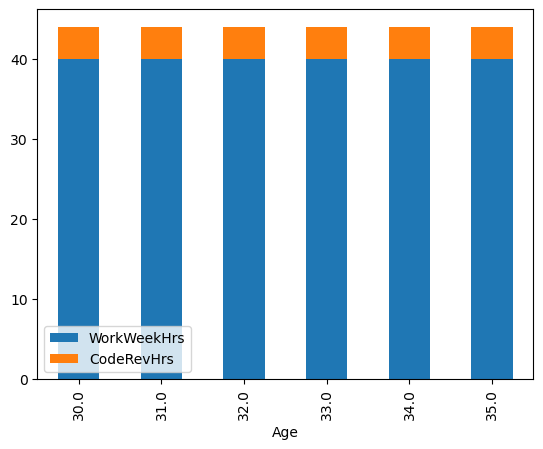

In [31]:
df.plot(kind='bar', stacked=True)

### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


In [32]:
# your code goes here
QUERY = """
SELECT Age, ConvertedComp FROM master
"""
df_cvtcmp = pd.read_sql_query(QUERY,conn)
df_cvtcmp.head()

,Age,ConvertedComp
0,22.0,61000.0
1,23.0,95179.0
2,28.0,90000.0
3,26.0,455352.0
4,29.0,65277.0


In [33]:
df = df_cvtcmp[(df_cvtcmp['Age']>=45)&(df_cvtcmp['Age']<=60)].groupby('Age')['ConvertedComp'].median()
df.head()

Age
45.0     90330.0
46.0     91593.0
47.0     91606.0
48.0    105750.0
49.0     85248.0
Name: ConvertedComp, dtype: float64

<Axes: xlabel='Age'>

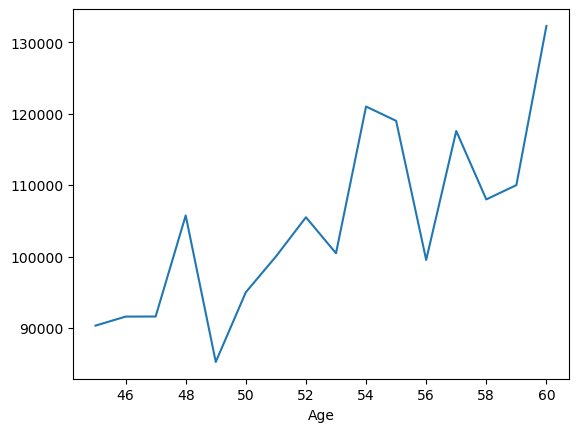

In [34]:
df.plot(kind='line')

<Axes: xlabel='Age'>

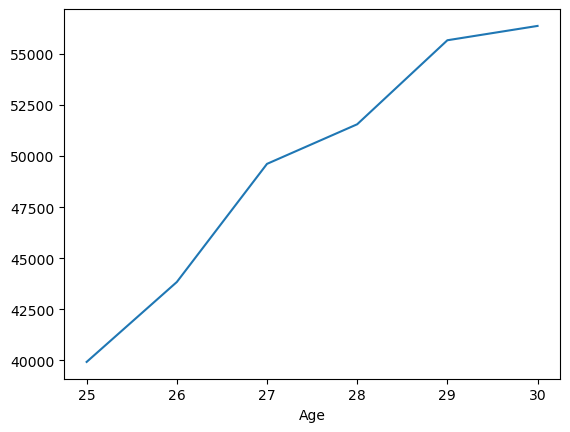

In [35]:
df_t = df_cvtcmp[(df_cvtcmp['Age']>=25)&(df_cvtcmp['Age']<=30)].groupby('Age')['ConvertedComp'].median()
df_t.plot(kind='line')

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


In [36]:
# your code goes here
QUERY = """
SELECT MainBranch FROM master
"""
df_mb = pd.read_sql_query(QUERY,conn)
df_mb.head()

,MainBranch
0,I am a developer by profession
1,I am a developer by profession
2,I am a developer by profession
3,I am a developer by profession
4,I am a developer by profession


<Axes: ylabel='MainBranch'>

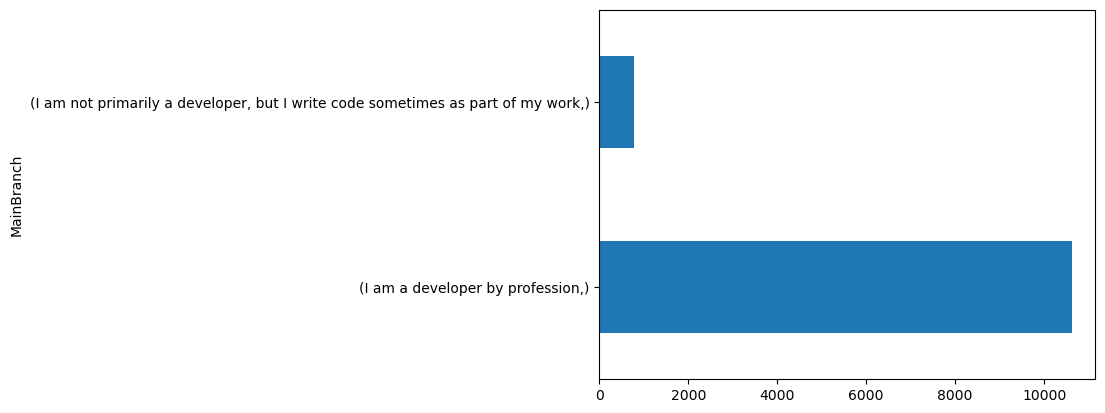

In [37]:
df = df_mb.value_counts()
df.plot(kind='barh')

Close the database connection.


In [38]:
#conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
